## Redes Neurais Artificiais 2025.2

- **Disciplina**: Redes Neurais Artificiais 2025.2  
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  

### Explorando uma base de dados

Nesta atividade prática iremos explorar a seguinte base de dados **_Forest Cover Type_**

1. Obtenha esta base de dados no seguinte link: https://www.kaggle.com/uciml/forest-cover-type-dataset/download
2. Consulte a documentação oficial da base de dados: https://archive.ics.uci.edu/ml/datasets/covertype
3. **Responda**:  

    3.1 O que é cada exemplo na base de dados?  
    3.2 Em que ano ela foi obtida?  
    3.3 Quem foram os responsáveis pela criação desta base de dados?  

In [ ]:
# ==============================================================
# Libraries Import
# ==============================================================

"""
This cell imports all necessary libraries for data analysis,
visualization, and modeling of the Forest Cover Type dataset.
"""

# Data manipulation and analysis
import os
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Deep learning
import tensorflow as tf
import keras
from keras import layers

# Kaggle dataset downloader
try:
    import kagglehub
except ImportError:
    kagglehub = None

print("All libraries imported successfully.")


All libraries imported successfully.


### Answers related to the Forest Cover Type Dataset

##### 3.1 What is each example in the dataset?

Each example represents a **30 × 30 meter cell** of forest land in the **Roosevelt National Forest**, located in northern Colorado, USA.  
The objective is to **predict the predominant forest cover type** (such as spruce, aspen, or pine) based on **cartographic variables** such as elevation, aspect, slope, and soil characteristics.

##### 3.2 In which year was it obtained?

The dataset was collected and **made publicly available in 1998** as part of a research project conducted by the **U.S. Forest Service** and the **Colorado State University**.  
It was later hosted by the **UCI Machine Learning Repository** for research and educational purposes.


##### 3.3 Who were the creators of the dataset?

The **Forest Cover Type** dataset was created by **Jock A. Blackard** and **Denis J. Dean** from **Colorado State University**,  
with additional contributions from **Charles W. Anderson**, also from the same institution.  
Their research aimed to explore the use of machine learning models to predict vegetation cover using **cartographic data** and **remote sensing information**.


### Manipulando a base de dados

1. Abra a base de dados com o pandas
2. Imprima os 10 primeiros exemplos pertencentes à esta base
3. Imprima os 10 últimos exemplos pertencentes à esta base
4. Quantos exemplos esta base de dados possui?
5. Quais são os atributos que a base de dados possui e quais seus tipos?
6. Há algum dado faltante na base?
7. De acordo com a documentação da base de dados, qual o significado dos atributos do tipo "Soil Type"?  
  7.1 Este atributo é quantitativo ou qualitativo?  
  7.2 Qual o tipo de codificação utilizada para denotar este atributo? Consulte a seguinte referência:  
  * https://pbpython.com/categorical-encoding.html

In [ ]:
# ==============================================================
# Load the dataset using pandas
# ==============================================================

"""
This cell loads the Forest Cover Type dataset into a pandas DataFrame.
If 'kagglehub' is installed, it will download the data automatically.
Otherwise, you can manually place the CSV file in the same folder.
"""

try:
    path = kagglehub.dataset_download("uciml/forest-cover-type-dataset")
    csv_path = os.path.join(path, "covtype.csv")
    df = pd.read_csv(csv_path)
    print("Dataset successfully loaded from Kaggle.")
except Exception as e:
    print("Error using kagglehub:", e)
    df = pd.read_csv("covtype.csv")
    print("Dataset loaded from local file.")

# Display dataset shape
print("Dataset shape:", df.shape)


Dataset successfully loaded from Kaggle.
Dataset shape: (581012, 55)


In [ ]:
# ==============================================================
# Display the first 10 examples
# ==============================================================

"""
This cell prints the first 10 rows of the dataset to understand its structure.
"""

df.head(10)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
# ==============================================================
# Display the last 10 examples
# ==============================================================

"""
This cell prints the last 10 rows of the dataset.
"""

df.tail(10)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
581002,2419,168,25,108,33,124,230,240,126,812,...,0,0,0,0,0,0,0,0,0,3
581003,2415,161,25,95,29,120,236,237,116,815,...,0,0,0,0,0,0,0,0,0,3
581004,2410,158,24,90,24,120,238,236,115,819,...,0,0,0,0,0,0,0,0,0,3
581005,2405,159,22,90,19,120,237,238,119,824,...,0,0,0,0,0,0,0,0,0,3
581006,2401,157,21,90,15,120,238,238,119,830,...,0,0,0,0,0,0,0,0,0,3
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3
581011,2383,165,13,60,4,67,231,244,141,875,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
# ==============================================================
# Number of examples in the dataset
# ==============================================================

"""
This cell prints the total number of examples (rows) in the dataset.
"""

num_examples = df.shape[0]
print(f"The dataset contains {num_examples} examples (rows).")


The dataset contains 581012 examples (rows).


In [ ]:
# ==============================================================
# Attributes and their data types
# ==============================================================

"""
This cell lists all attributes (columns) and their corresponding data types.
"""

print("Attributes and data types:\n")
print(df.dtypes)


Attributes and data types:

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil

In [ ]:
# ==============================================================
# Check for missing data
# ==============================================================

"""
This cell checks if the dataset contains any missing values.
"""

missing_values = df.isnull().sum()
print("Missing values per attribute:\n")
print(missing_values)

if missing_values.sum() == 0:
    print("\nNo missing data found in this dataset.")
else:
    print("\nThere are missing values in the dataset.")


Missing values per attribute:

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type

In [ ]:
# ==============================================================
# Meaning of the "Soil Type" attributes
# ==============================================================

"""
This section answers the theoretical questions about the 'Soil_Type' attributes,
based on the official documentation of the Forest Cover Type dataset.
Questions 7, 7.1, and 7.2 are answered in separate Markdown cells below.
"""

"\nThis section answers the theoretical questions about the 'Soil_Type' attributes,\nbased on the official documentation of the Forest Cover Type dataset.\nQuestions 7, 7.1, and 7.2 are answered in separate Markdown cells below.\n"

##### 7. What is the meaning of the *Soil Type* attributes?

Each **`Soil_Type`** column represents a **binary variable** that indicates the **presence (1)** or **absence (0)** of a specific soil type in a 30 × 30 meter area of the **Roosevelt National Forest**, located in northern Colorado, USA.  

There are **40 soil type columns** in total, each one referring to a distinct soil classification defined by the **U.S. Geological Survey (USGS)**.  
These attributes capture information about **geological composition, soil texture, and local environmental conditions**, which influence the type of forest cover in that region.

##### 7.1 Are the *Soil Type* attributes quantitative or qualitative?

The **`Soil_Type`** attributes are **qualitative (categorical)**.  
They describe categories (types of soil) rather than continuous or measurable quantities.  
Even though the data are stored as binary values (0 or 1), their meaning is **categorical**, not numerical.


##### 7.2 What type of encoding is used to represent these attributes?

The **`Soil_Type`** attributes use **One-Hot Encoding**.  
In this encoding method, each possible category (soil type) is represented as a separate binary column —  
a value of **1** indicates that the sample belongs to that soil type, while **0** indicates it does not.  

This approach avoids assigning arbitrary numerical order to categorical data and ensures that the model interprets each soil type **independently**.  

**Reference:** [Categorical Encoding in Python – Practical Business Python](https://pbpython.com/categorical-encoding.html)

### Visualizando a base de dados

1. Baseando-se nos fundamentos de visualização de dados abordados na disciplina, plote cada um dos atributos preditores de maneira a enfatizar a sua distribuição, tendência central e dispersão  
1.1 Considere que o número de columas no dataset é diferente do número de atributos, conforme discussão promovida a respeito do dataset  
1.2 Se preferir, opte por complementar as informações visuais com medidas estatísticas  
2. A partir da visualização elaborada, o que pode-se dizer a respeito do balanceamento do atributo-alvo?
3. Que tipo de tarefa de Aprendizado de Máquina é sugestiva para este problema?  
3.1 Apresente métricas de desempenho compatíveis para a avaliação do problema (liste-as)  
3.2 Escolha uma das métricas apresentadas para ser utilizada como referência pela equipe

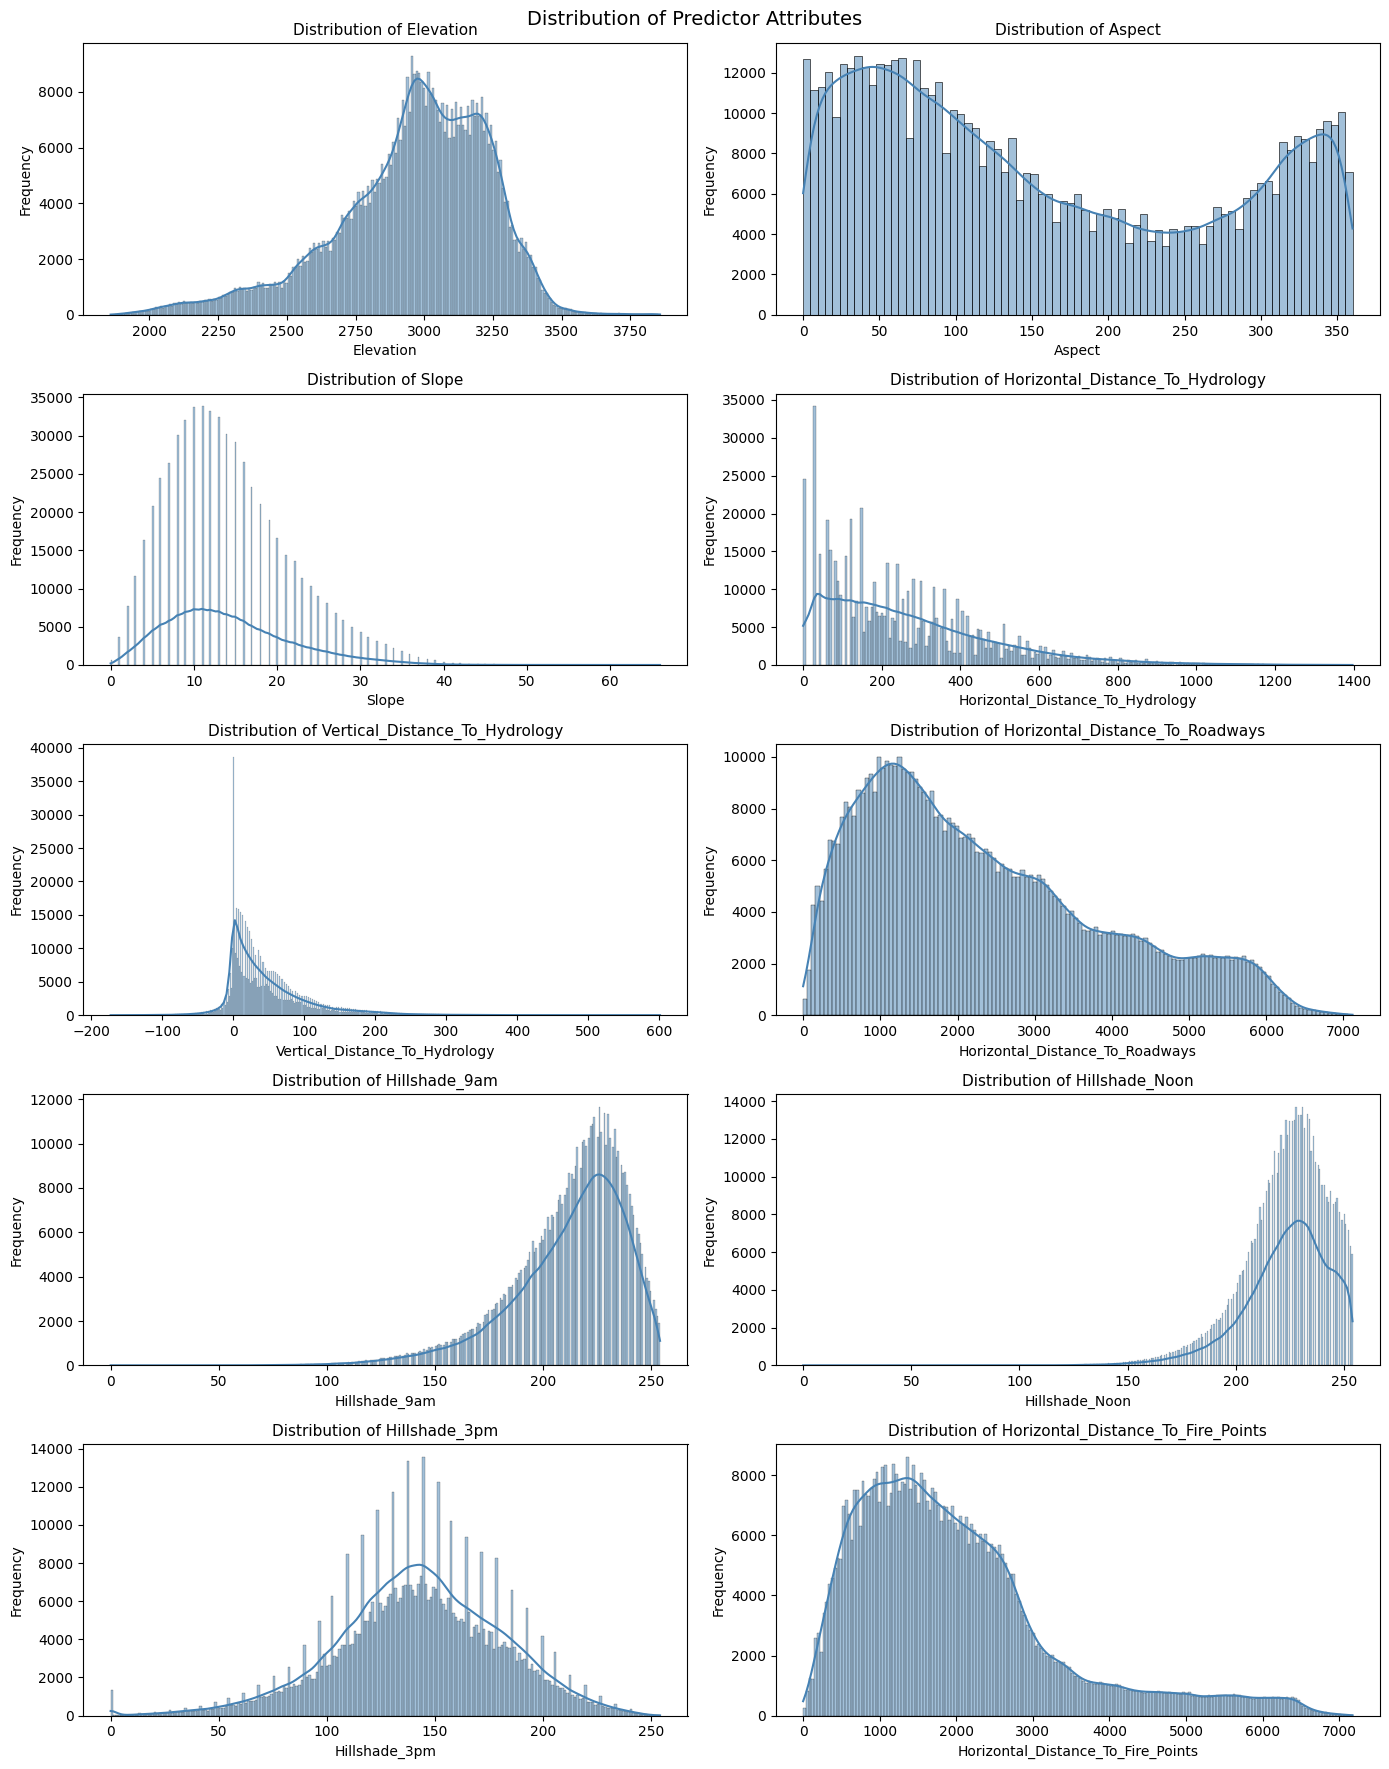

In [ ]:
# ==============================================================
# Visualizing attribute distributions
# ==============================================================

"""
This cell visualizes the distribution of the main predictor attributes
through histograms and Kernel Density Estimation (KDE) curves,
highlighting their general shape and frequency.
"""

# List of main numeric attributes
predictor_columns = [
    "Elevation", "Aspect", "Slope",
    "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways",
    "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points"
]

# Plot histograms
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 18))
axes = axes.flatten()

for i, col in enumerate(predictor_columns):
    sns.histplot(df[col], ax=axes[i], kde=True, color="steelblue")
    axes[i].set_title(f"Distribution of {col}", fontsize=11)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

plt.suptitle("Distribution of Predictor Attributes", fontsize=14)
plt.tight_layout()
plt.show()


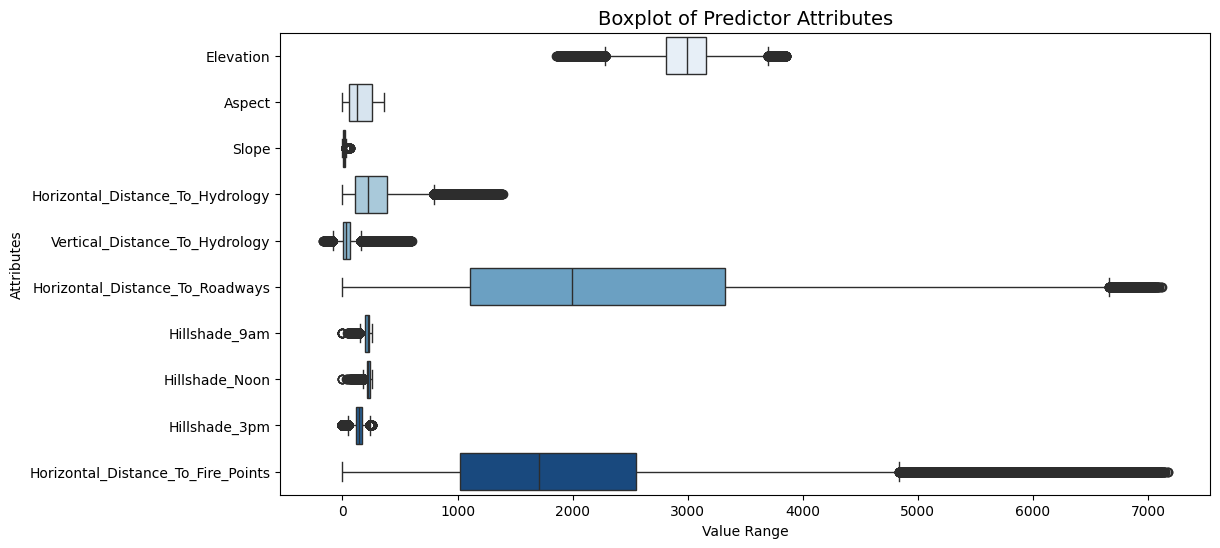

In [ ]:
# ==============================================================
# Central tendency and dispersion visualization
# ==============================================================

"""
This cell uses boxplots to visualize central tendency (median)
and dispersion (interquartile range and outliers) of numeric features.
"""

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[predictor_columns], orient="h", palette="Blues")
plt.title("Boxplot of Predictor Attributes", fontsize=14)
plt.xlabel("Value Range")
plt.ylabel("Attributes")
plt.show()


In [ ]:
# ==============================================================
# Complementary statistical measures
# ==============================================================

"""
This cell provides complementary descriptive statistics
(mean, standard deviation, min, max, and quartiles)
for the main numeric predictor attributes.
"""

# Display descriptive statistics for numeric features
print("Descriptive Statistics for Main Numeric Predictors:\n")
display(df[predictor_columns].describe().T)


Descriptive Statistics for Main Numeric Predictors:



,count,mean,std,min,25%,50%,75%,max
Elevation,581012.0,2959.365301,279.984734,1859.0,2809.0,2996.0,3163.0,3858.0
Aspect,581012.0,155.656807,111.913721,0.0,58.0,127.0,260.0,360.0
Slope,581012.0,14.103704,7.488242,0.0,9.0,13.0,18.0,66.0
Horizontal_Distance_To_Hydrology,581012.0,269.428217,212.549356,0.0,108.0,218.0,384.0,1397.0
Vertical_Distance_To_Hydrology,581012.0,46.418855,58.295232,-173.0,7.0,30.0,69.0,601.0
Horizontal_Distance_To_Roadways,581012.0,2350.146611,1559.254870,0.0,1106.0,1997.0,3328.0,7117.0
Hillshade_9am,581012.0,212.146049,26.769889,0.0,198.0,218.0,231.0,254.0
Hillshade_Noon,581012.0,223.318716,19.768697,0.0,213.0,226.0,237.0,254.0
Hillshade_3pm,581012.0,142.528263,38.274529,0.0,119.0,143.0,168.0,254.0
Horizontal_Distance_To_Fire_Points,581012.0,1980.291226,1324.195210,0.0,1024.0,1710.0,2550.0,7173.0


##### 2. What can be said about the balance of the target attribute?

The **target attribute** (`Cover_Type`) represents seven possible forest cover classes.  
By visualizing its frequency distribution, it is clear that the dataset is **unbalanced** —  
some classes (such as *Ponderosa Pine* and *Aspen*) occur much more frequently than others.  

This imbalance means that **certain forest cover types dominate the dataset**, which can bias the learning process of models if not properly addressed (e.g., via class weighting or resampling).

/tmp/ipykernel_39344/2568536037.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Cover_Type", data=df, palette="crest")


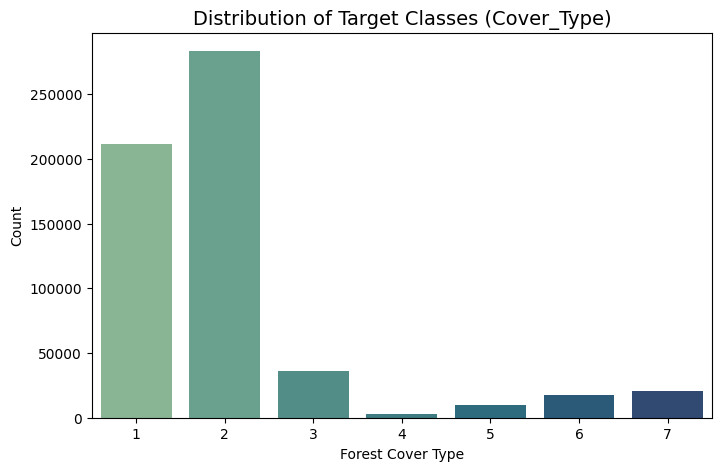

Target class counts:
 Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64

Proportion per class (%):
 Cover_Type
2    48.76
1    36.46
3     6.15
7     3.53
6     2.99
5     1.63
4     0.47
Name: proportion, dtype: float64


In [ ]:
# ==============================================================
# Target variable distribution
# ==============================================================

"""
This cell visualizes the class distribution (balance) of the target variable.
"""

plt.figure(figsize=(8, 5))
sns.countplot(x="Cover_Type", data=df, palette="crest")
plt.title("Distribution of Target Classes (Cover_Type)", fontsize=14)
plt.xlabel("Forest Cover Type")
plt.ylabel("Count")
plt.show()

# Display numerical distribution
print("Target class counts:\n", df["Cover_Type"].value_counts())
print("\nProportion per class (%):\n", (df["Cover_Type"].value_counts(normalize=True) * 100).round(2))


#### 3. What type of Machine Learning task does this problem suggest?

This problem is a **Supervised Learning** task, specifically a **Multiclass Classification** problem.  
Each instance (a 30×30 m forest cell) has known predictor variables and a labeled category (`Cover_Type`) that represents the predominant forest type.  

Therefore, the objective is to **predict the forest cover class** based on numerical and categorical environmental attributes.


##### 3.1 Suitable performance metrics for this problem

For a **multiclass classification** problem, appropriate performance metrics include:

- **Accuracy** – overall proportion of correct predictions.  
- **Precision** – fraction of correctly predicted positive instances among all predicted positives (per class).  
- **Recall (Sensitivity)** – fraction of actual positives correctly identified.  
- **F1-Score** – harmonic mean of Precision and Recall, balancing both.  
- **Confusion Matrix** – detailed comparison between true and predicted classes.  
- **Macro / Weighted Averages** – averaged metrics that account for class imbalance.  
- **Cohen’s Kappa** – measures agreement between predictions and true labels beyond chance.


##### 3.2 Metric chosen as reference

The reference metric chosen for this project is the **F1-Score (Weighted Average)**.  

It is more informative than raw accuracy in unbalanced datasets,  
as it considers both **precision and recall** while giving proportional importance to each class.  
This ensures fairer evaluation across all forest cover types.
